<a href="https://colab.research.google.com/github/Harishchand83077/machine-learning-projects/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
csv_path="/content/all_stocks_5yr.csv"
df=pd.read_csv(csv_path)
df.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
df.shape

(307060, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307060 entries, 0 to 307059
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    307060 non-null  object 
 1   open    307055 non-null  float64
 2   high    307057 non-null  float64
 3   low     307057 non-null  float64
 4   close   307060 non-null  float64
 5   volume  307060 non-null  int64  
 6   Name    307059 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 16.4+ MB


In [7]:
pd.isnull(df).sum()

,0
date,0
open,5
high,3
low,3
close,0
volume,0
Name,1


In [8]:
df['Date']=pd.to_datetime(df['date'])

In [9]:
df.describe()

,open,high,low,close,volume,Date
count,307055.000000,307057.000000,307057.000000,307060.000000,3.070600e+05,307060
mean,85.514235,86.293636,84.718263,85.533151,4.736047e+06,2015-08-18 14:18:53.016348416
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00,2013-02-08 00:00:00
25%,39.467500,39.860000,39.060000,39.480000,1.100604e+06,2014-05-20 00:00:00
50%,62.810000,63.381500,62.215000,62.830000,2.103795e+06,2015-08-21 00:00:00
75%,94.120000,94.930000,93.314000,94.170000,4.197336e+06,2016-11-16 00:00:00
max,1477.390000,1498.000000,1450.040000,1450.890000,4.313326e+08,2018-02-07 00:00:00
std,96.785271,97.593687,95.919216,96.784644,1.070144e+07,NaN


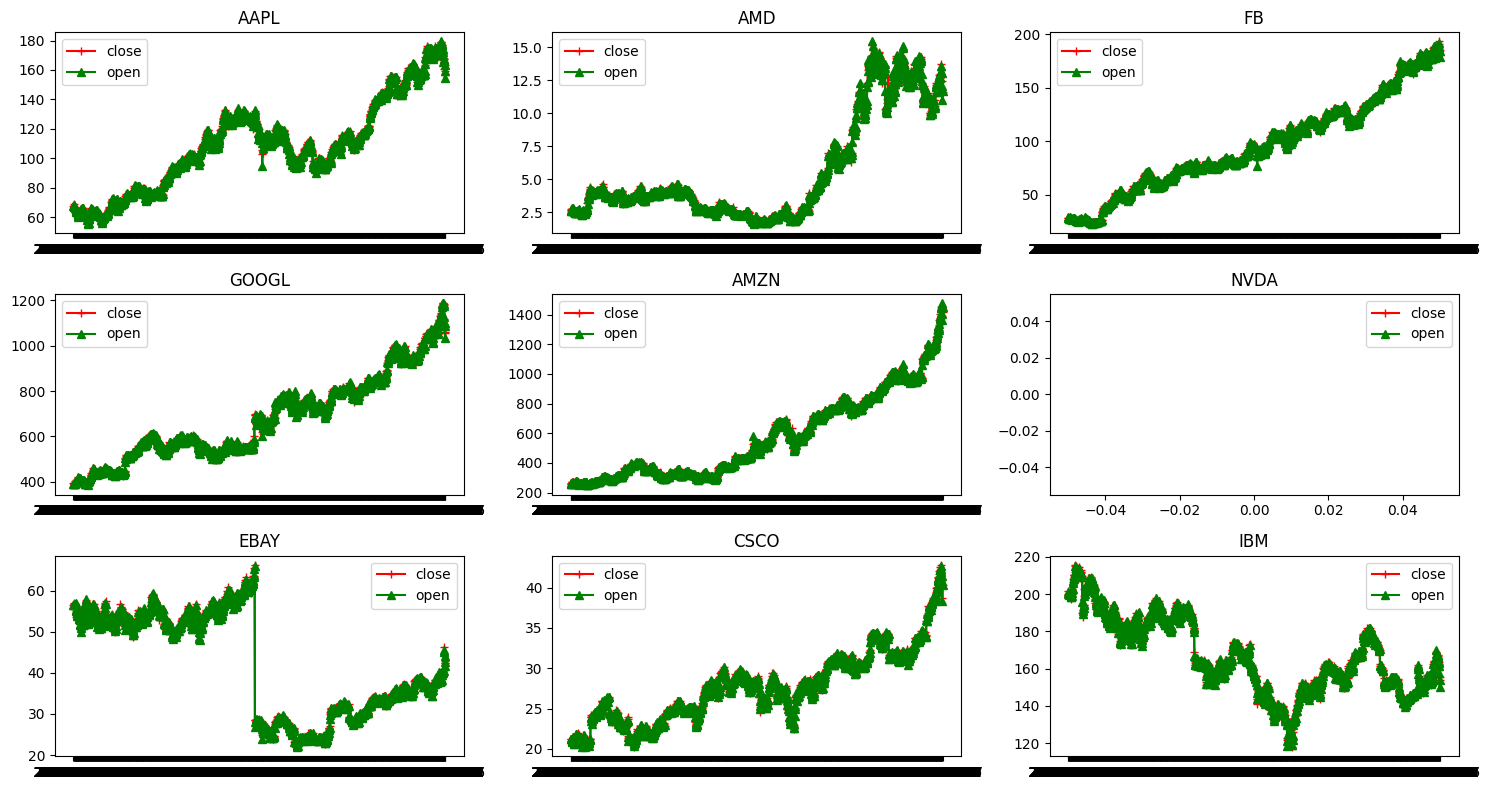

In [10]:
import matplotlib.pyplot as plt
# Define the list of companies you want to plot
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = df[df['Name'] == company]
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()


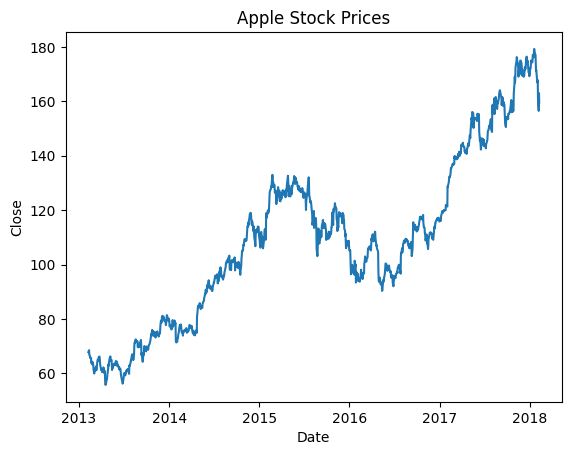

In [13]:
from datetime import datetime
apple = df[df['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['Date'] > datetime(2013,1,1))
 & (apple['Date']<datetime(2018,1,1))]
plt.plot(apple['Date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [18]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [24]:
import tensorflow as tf
from tensorflow import keras
#from keras.models import sequential
model=keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(units=32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0472
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056
Epoch 13/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054
Epoch 14/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0055
Epoch 15/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047
Epoch 16/20
36/36 

In [29]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
MSE 14.730984525356911
RMSE 3.8380964716063235


<ipython-input-30-3809fdfc872e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


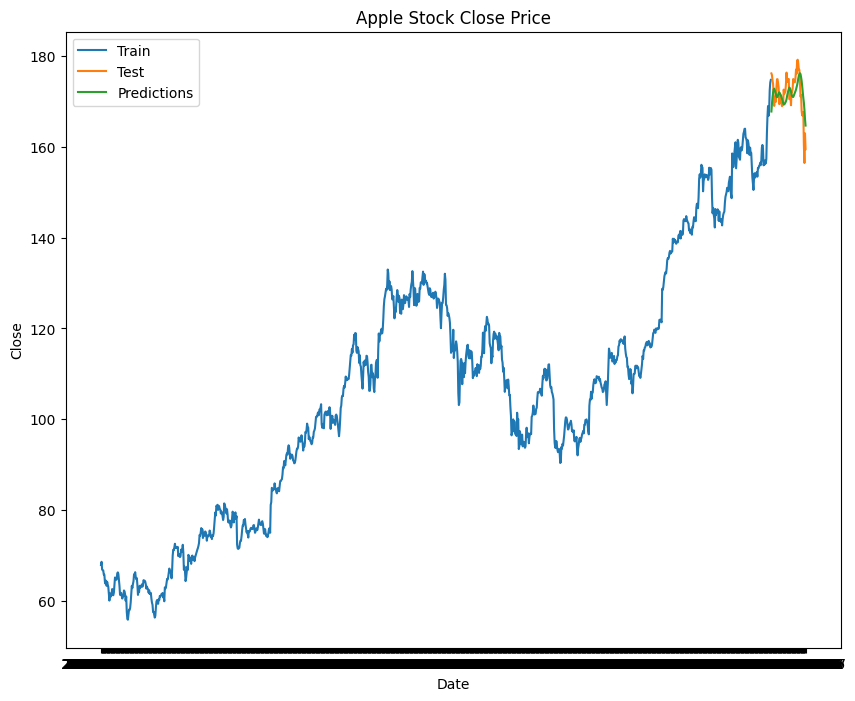

In [30]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])

# This code is modified by Susobhan Akhuli